In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import pickle

# Function to load and preprocess images
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Function to extract VGG16 features
def extract_vgg16_features(images, batch_size=32):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
    
    features = []
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i+batch_size]
        batch_features = model.predict(batch_images)
        features.append(batch_features)
    
    return np.concatenate(features)

# Directory containing images
data_dir = '/kaggle/input/celebrities/data'

# List all actor directories
actor_dirs = [os.path.join(data_dir, actor) for actor in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, actor))]

# List to hold image paths and labels
image_paths = []
actor_labels = []

for actor_dir in actor_dirs:
    actor_name = os.path.basename(actor_dir)
    actor_images = [os.path.join(actor_dir, img) for img in os.listdir(actor_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
    image_paths.extend(actor_images)
    actor_labels.extend([actor_name] * len(actor_images))

# Load and preprocess images
images = load_and_preprocess_images(image_paths)

# Extract VGG16 features with higher batch size
vgg16_features = extract_vgg16_features(images, batch_size=64)

# Save extracted features and image paths to a pickle file
output_file = 'vgg16_features.pkl'
with open(output_file, 'wb') as f:
    pickle.dump({
        'features': vgg16_features,
        'labels': actor_labels,
        'image_paths': image_paths
    }, f)

print(f"VGG16 features saved to {output_file}")


2024-08-08 05:43:29.891701: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 05:43:29.891826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 05:43:30.023823: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 99ms/step


I0000 00:00:1723095927.003974     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

Enter the path to the input image:  /kaggle/input/imgages/amir.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
The input image looks most like Aamir_Khan with a similarity score of 0.2375


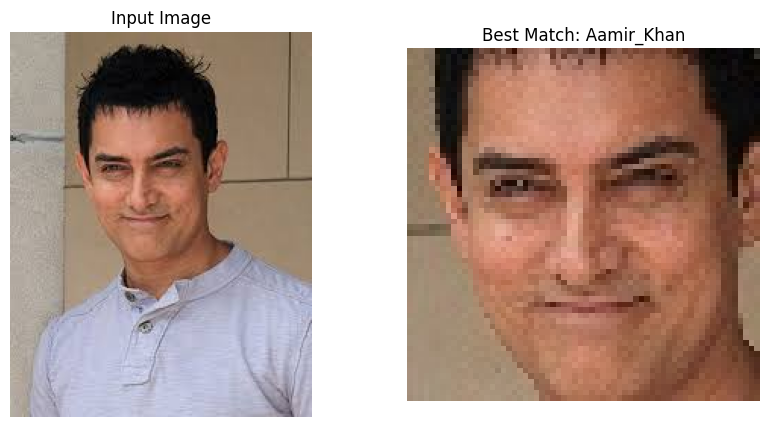

Precision at 5: 0.2000
Top K matches:
1: Aamir_Khan with a similarity score of 0.2375
2: Shah_Rukh_Khan with a similarity score of 0.2262
3: Uday_Chopra with a similarity score of 0.2238
4: Sidharth_Malhotra with a similarity score of 0.2238
5: Sushant_Singh_Rajput with a similarity score of 0.2193


In [6]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = preprocess_input(img)
    return np.array([img])

# Function to extract VGG16 features from an image
def extract_vgg16_features(image):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
    features = model.predict(image)
    features = features.flatten()  # Flatten the features to a 1D array
    return features

# Load the precomputed VGG16 features and labels
with open('vgg16_features.pkl', 'rb') as f:
    data = pickle.load(f)

# Ensure the data is in the correct format
actor_features = data['features']
actor_labels = data['labels']
actor_image_paths = data['image_paths']

# Flatten the actor features if they are not already flattened
actor_features = actor_features.reshape(len(actor_features), -1)

# Manually enter the path to the input image
input_image_path = input("Enter the path to the input image: ")

# Load and preprocess the input image
input_image = load_and_preprocess_image(input_image_path)

# Extract VGG16 features from the input image
input_features = extract_vgg16_features(input_image)

# Compute cosine similarity between the input image features and actor features
input_features_2d = input_features.reshape(1, -1)
similarities = cosine_similarity(input_features_2d, actor_features)
similarities = similarities.flatten()

# Find the actor with the highest similarity score
best_match_index = np.argmax(similarities)
best_match_score = similarities[best_match_index]

# Get the best match actor name
best_match_actor = actor_labels[best_match_index]

# Display the result
print(f"The input image looks most like {best_match_actor} with a similarity score of {best_match_score:.4f}")

# Display input image and best match image
input_img = cv2.imread(input_image_path)
best_match_img_path = actor_image_paths[best_match_index]
best_match_img = cv2.imread(best_match_img_path)

# Convert images from BGR to RGB
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
best_match_img = cv2.cvtColor(best_match_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(input_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Best Match: {best_match_actor}")
plt.imshow(best_match_img)
plt.axis('off')

plt.show()

# Calculate precision at K (P@K)
def precision_at_k(similarities, labels, k):
    top_k_indices = np.argsort(similarities)[-k:][::-1]
    top_k_labels = [labels[i] for i in top_k_indices]
    correct_matches = sum([1 for label in top_k_labels if label == best_match_actor])
    return correct_matches / k

# Specify the value of K
K = 5
p_at_k = precision_at_k(similarities, actor_labels, K)
print(f"Precision at {K}: {p_at_k:.4f}")

# Optionally, print top K matches
top_k_indices = np.argsort(similarities)[-K:][::-1]
top_k_matches = [(actor_labels[i], similarities[i]) for i in top_k_indices]
print("Top K matches:")
for i, (label, score) in enumerate(top_k_matches, start=1):
    print(f"{i}: {label} with a similarity score of {score:.4f}")
